In [2]:
! pip install -q pandas matplotlib scikit-learn openai dotenv tqdm liqfit sentencepiece transformers

import sys
print("Current python version: ", sys.version)


Current python version:  3.11.11 (main, Dec 11 2024, 10:25:04) [Clang 14.0.6 ]


### Load data

In [8]:
from sklearn.metrics import classification_report 

In [9]:
import pandas as pd
import logging

logging.getLogger("httpx").setLevel(logging.WARNING)

# Load data
df = pd.read_parquet('../deduplication/unique_documents/2024-court-decisions.parquet')

# Print the number of rows
print(f'Number of rows: {df.shape[0]}')

# Print the first 10 rows
print(df.head(10))

Number of rows: 44762
          id                                               text
0  116062943  |Справа № 492/1079/23 Провадження № 3/946/3143...
1  116063012  Справа № 505/4903/23\nПровадження № 3/505/3495...
2  116063017  УХВАЛА\nІМЕНЕМ УКРАЇНИ\nСправа №505/2076/21\nП...
3  116063024  Справа № 505/4479/23\nПровадження № 3/505/3277...
4  116063480  Справа № 562/2909/23\n\nП О С Т А Н О В А\n\n0...
5  116063616  Провадження № 3/760/8698/23\nу справі № 760/26...
6  116063738  Справа № 519/2086/23\n2-н/519/163/23\n\nУ Х В ...
7  116063743  Ухвала\nІменем України\n27 грудня 2023 року см...
8  116064019  ГОСПОДАРСЬКИЙ СУД ВІННИЦЬКОЇ ОБЛАСТІ\nвул. Пир...
9  116064511  Справа № 127/20838/23\nПровадження № 2/127/433...


In [10]:
df['text'].str.len().describe()

count    4.476200e+04
mean     1.305584e+04
std      4.472775e+04
min      1.000000e+00
25%      3.013000e+03
50%      5.586000e+03
75%      1.221700e+04
max      5.378995e+06
Name: text, dtype: float64

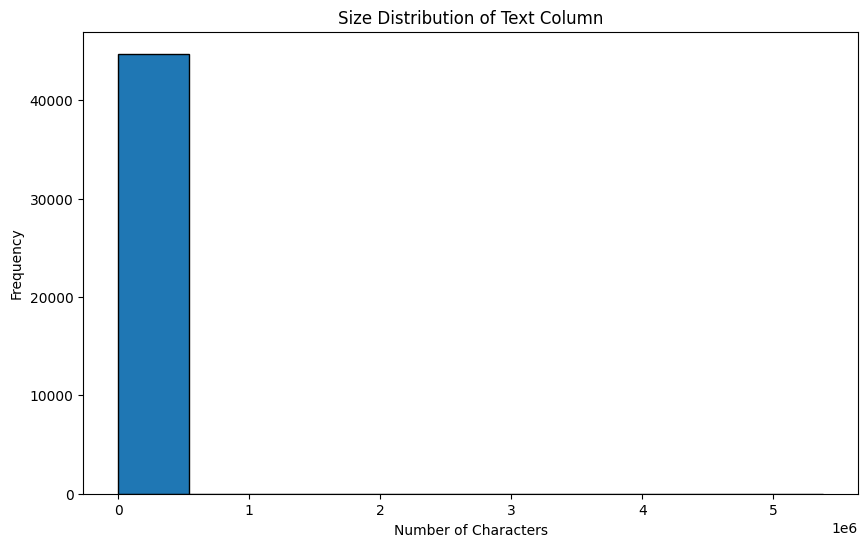

In [11]:
# Print size distribution of text column chart
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['text'].str.len(), bins=10, edgecolor='black')
plt.title('Size Distribution of Text Column')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.show()


In [12]:
# Limit court cases to 10_000 of characters in text
# Limit court cases to more than 1000 characters
df = df[df['text'].str.len() <= 10_000]
df = df[df['text'].str.len() > 1000]
print(f'Number of rows: {df.shape[0]}')

Number of rows: 30546


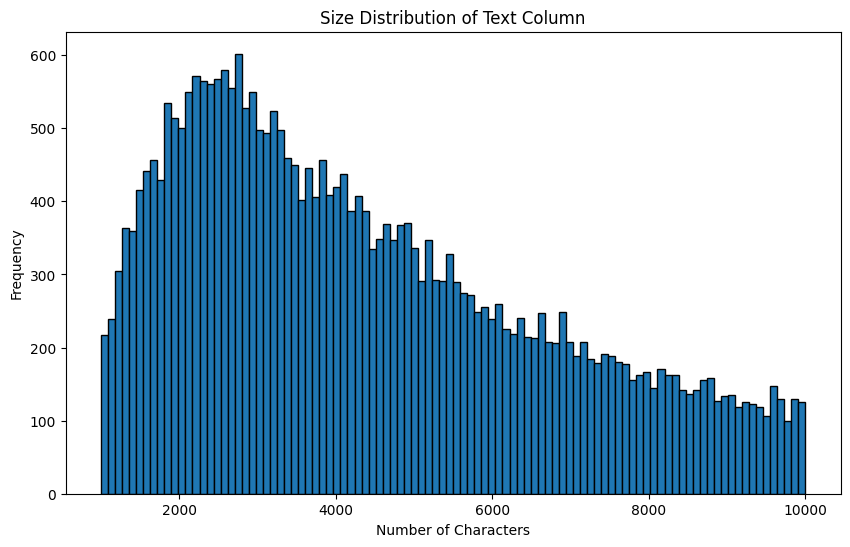

In [13]:
# Print size distribution of text column chart
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['text'].str.len(), bins=100, edgecolor='black')
plt.title('Size Distribution of Text Column')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.show()

In [14]:
# Get 20 documents that have 'НОМЕР_' entity. It should have less than 5 occurrences of this entity.
df['number_count'] = df['text'].str.count('НОМЕР_')
df['information_count'] = df['text'].str.count('ІНФОРМАЦІЯ_')
df['person_count'] = df['text'].str.count('ОСОБА_')
df['address_count'] = df['text'].str.count('АДРЕСА_')

df.head(20)

,id,text,number_count,information_count,person_count,address_count
1,116063012,Справа № 505/4903/23\nПровадження № 3/505/3495...,0,4,17,2
3,116063024,Справа № 505/4479/23\nПровадження № 3/505/3277...,7,2,15,1
4,116063480,Справа № 562/2909/23\n\nП О С Т А Н О В А\n\n0...,0,1,4,1
8,116064019,ГОСПОДАРСЬКИЙ СУД ВІННИЦЬКОЇ ОБЛАСТІ\nвул. Пир...,1,0,0,1
10,116064540,||Справа № 304/2867/23 Провадження № 2/304/448...,0,2,10,0
11,116064598,Справа №463/11390/23\nПровадження №1-кс/463/94...,0,0,7,0
12,116064808,Справа № 676/8477/23\nНомер провадження 2/676...,0,1,3,2
13,116064980,справа № 166/1209/23\nномер провадження 1-в/16...,0,0,11,0
14,116065052,справа № 361/3214/22\nпровадження № 2/361/1212...,0,0,6,0
15,116065153,Справа № 369/18278/23\n ...,0,0,17,0


In [1]:
entites = {
    'НОМЕР_': 'number',
    'ІНФОРМАЦІЯ_': 'information',
    'ОСОБА_': 'person',
    'АДРЕСА_': 'address',
}

# Iterate documents and collect a list of occurrences of 'НОМЕР_' entity.
# Each occurance should have a text followed by 'НОМЕР_' entity.
# Include only 5 words before 'НОМЕР_' entity.
# Collect all the occurrences and save them to a file new column.

import re

number_occurrences = []

df['number_occurrences'] = None
df['information_occurrences'] = None
df['person_occurrences'] = None
df['address_occurrences'] = None

for index, row in df.iterrows():
    text = row['text']
    
    
    for entity_name, entity_column in entites.items():
        unique_entities = set(re.findall(entity_name + '\d+', text))
        
        entity_occurrences = []

        for entity in unique_entities:
            # For each occurrence of entity, add start and end positions to the entity_occurrences dictionary
            entity_occurrences[entity] = []
            entity_positions = [(m.start(), m.end()) for m in re.finditer(entity, text)]
            for start, end in entity_positions:
                entity_occurrences[entity].append((start, end))
        df.at[index, entity_column + '_occurrences'] = entity_occurrences





NameError: name 'df' is not defined

In [16]:
df.head(20)

,id,text,number_count,information_count,person_count,address_count,number_occurrences,information_occurrences,person_occurrences,address_occurrences
1,116063012,Справа № 505/4903/23\nПровадження № 3/505/3495...,0,4,17,2,{},"{'ІНФОРМАЦІЯ_1': [(309, 321)], 'ІНФОРМАЦІЯ_3':...","{'ОСОБА_4': [(1186, 1193)], 'ОСОБА_3': [(786, ...","{'АДРЕСА_1': [(377, 385), (510, 518)]}"
3,116063024,Справа № 505/4479/23\nПровадження № 3/505/3277...,7,2,15,1,"{'НОМЕР_1': [(305, 312)], 'НОМЕР_2': [(338, 34...","{'ІНФОРМАЦІЯ_1': [(208, 220)], 'ІНФОРМАЦІЯ_2':...","{'ОСОБА_1': [(275, 282), (562, 569), (942, 949...","{'АДРЕСА_1': [(380, 388)]}"
4,116063480,Справа № 562/2909/23\n\nП О С Т А Н О В А\n\n0...,0,1,4,1,{},"{'ІНФОРМАЦІЯ_1': [(320, 332)]}","{'ОСОБА_1': [(310, 317), (692, 699), (1309, 13...","{'АДРЕСА_1': [(373, 381)]}"
8,116064019,ГОСПОДАРСЬКИЙ СУД ВІННИЦЬКОЇ ОБЛАСТІ\nвул. Пир...,1,0,0,1,"{'НОМЕР_1': [(633, 640)]}",{},{},"{'АДРЕСА_1': [(615, 623)]}"
10,116064540,||Справа № 304/2867/23 Провадження № 2/304/448...,0,2,10,0,{},"{'ІНФОРМАЦІЯ_1': [(740, 752), (2091, 2103)]}","{'ОСОБА_4': [(2081, 2088)], 'ОСОБА_3': [(730, ...",{}
11,116064598,Справа №463/11390/23\nПровадження №1-кс/463/94...,0,0,7,0,{},{},"{'ОСОБА_1': [(171, 178), (2222, 2229)], 'ОСОБА...",{}
12,116064808,Справа № 676/8477/23\nНомер провадження 2/676...,0,1,3,2,{},"{'ІНФОРМАЦІЯ_1': [(1495, 1507)]}","{'ОСОБА_1': [(318, 325)], 'ОСОБА_2': [(1262, 1...","{'АДРЕСА_1': [(329, 337)], 'АДРЕСА_2': [(1582,..."
13,116064980,справа № 166/1209/23\nномер провадження 1-в/16...,0,0,11,0,{},{},"{'ОСОБА_1': [(212, 219), (2465, 2472)], 'ОСОБА...",{}
14,116065052,справа № 361/3214/22\nпровадження № 2/361/1212...,0,0,6,0,{},{},"{'ОСОБА_1': [(338, 345), (476, 483), (813, 820...",{}
15,116065153,Справа № 369/18278/23\n ...,0,0,17,0,{},{},"{'ОСОБА_6': [(1876, 1883)], 'ОСОБА_4': [(1344,...",{}


### Separate documents for labeling

In [188]:
# Randomly select 40 documents from df_easy_to_label
# Save them to a csv file
# Remove them from original df
# Random should be reproducible
min_n_of_entities = 2
max_n_of_entities = 5

conditions = (
    (df['person_count'] <= 4) &
    (df['address_count'] >= min_n_of_entities) & (df['address_count'] <= max_n_of_entities) &
    (df['information_count'] >= min_n_of_entities) & (df['information_count'] <= max_n_of_entities) &
    (df['number_count'] >= min_n_of_entities) & (df['number_count'] <= max_n_of_entities)
)

df_easy_to_label = df.loc[conditions].copy()
print(df_easy_to_label.shape) # (490, 6)
df_easy_to_label.head(20)

df_easy_to_label = df_easy_to_label.sample(n=40, random_state=42)
df_easy_to_label.to_csv('df_easy_to_label.csv', index=False)

(131, 10)


In [189]:
# Remove the selected documents from the original df
df = df[~df['id'].isin(df_easy_to_label['id'])]
print(df.shape)

(30506, 10)


### Import labeled data

In [17]:
df_labeled = pd.read_csv('df_labeled_40.csv')
df_labeled['number_labels'] = df_labeled['number']
df_labeled['information_labels'] = df_labeled['information']
df_labeled['case_labels'] = df_labeled['case']
df_labeled['gender_labels'] = df_labeled['gender']

def map_to_labelstudio_format(before):
    return [
        {
            "start": start,
            "end": end,
            "text": key
        }
        for key, spans in eval(before).items()
        for start, end in spans
    ]

df_labeled['number_occurrences'] = df_labeled['number_occurrences'].apply(map_to_labelstudio_format)
df_labeled['information_occurrences'] = df_labeled['information_occurrences'].apply(map_to_labelstudio_format)
# print unmatching list sizes
def print_unmatching_list_sizes(row, label_column, occurrences_column):
    len_of_unique_entities = len([entity['text'] for entity in row[occurrences_column]])
    len_of_labels = len(eval(row[label_column]))

    if len_of_unique_entities != len_of_labels:
        print(row['id'], len_of_unique_entities, len_of_labels)
        # sort by start position
        print(len(row[occurrences_column]))
        # sort by start position
        print(len(eval(row[label_column])))
        print(sorted([entity for entity in row[occurrences_column]], key=lambda x: x['start']))
        print(row[label_column])
        print(sorted([entity for entity in eval(row['number_labels'])], key=lambda x: x['start']))

df_labeled.apply(lambda x: print_unmatching_list_sizes(x, 'number_labels', 'number_occurrences'), axis=1)
df_labeled.apply(lambda x: print_unmatching_list_sizes(x, 'information_labels', 'information_occurrences'), axis=1)

df_labeled[['id', 'number_occurrences', 'number_labels', 'information_occurrences', 'information_labels']].head(5)


,id,number_occurrences,number_labels,information_occurrences,information_labels
0,121315471,"[{'start': 558, 'end': 565, 'text': 'НОМЕР_1'}...","[{""end"":565,""text"":""НОМЕР_1"",""start"":558,""labe...","[{'start': 528, 'end': 540, 'text': 'ІНФОРМАЦІ...","[{""end"":540,""text"":""ІНФОРМАЦІЯ_1"",""start"":528,..."
1,120928720,"[{'start': 599, 'end': 606, 'text': 'НОМЕР_1'}...","[{""end"":606,""text"":""НОМЕР_1"",""start"":599,""labe...","[{'start': 577, 'end': 589, 'text': 'ІНФОРМАЦІ...","[{""end"":589,""text"":""ІНФОРМАЦІЯ_1"",""start"":577,..."
2,122151597,"[{'start': 452, 'end': 459, 'text': 'НОМЕР_2'}...","[{""end"":435,""text"":""НОМЕР_1"",""start"":428,""labe...","[{'start': 409, 'end': 421, 'text': 'ІНФОРМАЦІ...","[{""end"":421,""text"":""ІНФОРМАЦІЯ_1"",""start"":409,..."
3,121218990,"[{'start': 518, 'end': 525, 'text': 'НОМЕР_1'}...","[{""end"":525,""text"":""НОМЕР_1"",""start"":518,""labe...","[{'start': 528, 'end': 540, 'text': 'ІНФОРМАЦІ...","[{""end"":540,""text"":""ІНФОРМАЦІЯ_1"",""start"":528,..."
4,122318861,"[{'start': 8314, 'end': 8321, 'text': 'НОМЕР_5...","[{""end"":570,""text"":""НОМЕР_4"",""start"":563,""labe...","[{'start': 524, 'end': 536, 'text': 'ІНФОРМАЦІ...","[{""end"":536,""text"":""ІНФОРМАЦІЯ_2"",""start"":524,..."


In [18]:
def get_label_by_coordinates(labels, coordinates):
    for entity in labels:
        end = entity['end']
        start = entity['start']
        if start == coordinates[0] and end == coordinates[1]:
            return entity['labels'][0]
    raise ValueError('No label found')

labeled_as_string = '[{"end":1059,"text":"НОМЕР_2","start":1052,"labels":["MILITARY_UNIT"]}]'
assert get_label_by_coordinates(eval(labeled_as_string), (1052, 1059)) == 'MILITARY_UNIT'

label_ids = []
predicted_labels = []

def extract_labels(dataset, label_column, limit=None):
    true_labels = []
    for index, row in dataset.iterrows():
        labels = eval(row[label_column])
        
        unique_entities = set()
        for entity in labels:
            unique_entities.add(entity['text'])
        sorted_unique_entities = sorted(list(unique_entities))
        
        for entity in sorted_unique_entities:
            for label in labels:
                if label['text'] == entity:
                    label_ids.append(row['id'])
                    true_labels.append(label['labels'][0])
                    break
        
        if limit is not None and index >= limit:
            break
    print(true_labels)
    return true_labels


number_true_labels = extract_labels(df_labeled, 'number_labels')
information_true_labels = extract_labels(df_labeled, 'information_labels')

print("True labels size (number): ", len(number_true_labels))
print("True labels size (information): ", len(information_true_labels))

['TAXPAYER_ID', 'TAXPAYER_ID', 'TAXPAYER_ID', 'ID_OLD', 'TAXPAYER_ID', 'EDRPOU', 'OTHER', 'OTHER', 'EDRPOU', 'EDRPOU', 'IBAN', 'TAXPAYER_ID', 'IBAN', 'TAXPAYER_ID', 'TAXPAYER_ID', 'IBAN', 'TAXPAYER_ID', 'IBAN', 'TAXPAYER_ID', 'TAXPAYER_ID', 'TAXPAYER_ID', 'TAXPAYER_ID', 'TAXPAYER_ID', 'TAXPAYER_ID', 'TAXPAYER_ID', 'TAXPAYER_ID', 'IBAN', 'IBAN', 'TAXPAYER_ID', 'TAXPAYER_ID', 'TAXPAYER_ID', 'TAXPAYER_ID', 'TAXPAYER_ID', 'TAXPAYER_ID', 'EDRPOU', 'TAXPAYER_ID', 'TAXPAYER_ID', 'EDRPOU', 'TAXPAYER_ID', 'LICENSE_PLATE', 'VIN', 'MILITARY_UNIT', 'MILITARY_UNIT', 'IBAN', 'TAXPAYER_ID', 'IBAN', 'IBAN', 'TAXPAYER_ID', 'MILITARY_UNIT', 'TAXPAYER_ID', 'IBAN', 'IBAN', 'TAXPAYER_ID', 'LICENSE_PLATE', 'LICENSE_PLATE', 'MILITARY_UNIT', 'TAXPAYER_ID', 'ID_OLD', 'ID', 'TAXPAYER_ID', 'TAXPAYER_ID']
['DATE_OF_BIRTH', 'DATE_OF_BIRTH', 'DATE_OF_BIRTH', 'DATE_OF_BIRTH', 'URL', 'ORG_NAME', 'DATE_OF_BIRTH', 'DATE_OF_BIRTH', 'DATE_OF_BIRTH', 'DATE_OF_BIRTH', 'DATE_OF_BIRTH', 'DATE_OF_BIRTH', 'DATE_OF_BIRTH', 'DAT

### Predict

In [19]:
! pip install -q liqfit sentencepiece
from liqfit.pipeline import ZeroShotClassificationPipeline
from liqfit.models import T5ForZeroShotClassification
from transformers import T5Tokenizer
from transformers import pipeline
from tqdm import tqdm
tqdm.pandas()

/Users/rudie/miniconda3/envs/testing-ner/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
from openai import OpenAI

from dotenv import load_dotenv
import os

from typing import List, Literal
from enum import Enum
from pydantic import BaseModel, Field
from sklearn.metrics import classification_report


load_dotenv()
openai_api_key = os.getenv("OPENAI_API_KEY")
print('OpenAI API key loaded', openai_api_key[-5:])

openai_client = OpenAI(api_key=openai_api_key)

OpenAI API key loaded fJjIA


In [54]:
model = T5ForZeroShotClassification.from_pretrained('knowledgator/comprehend_it-multilingual-t5-base')
tokenizer = T5Tokenizer.from_pretrained('knowledgator/comprehend_it-multilingual-t5-base')

classifier1_model = ZeroShotClassificationPipeline(model=model, tokenizer=tokenizer, hypothesis_template = '{}', encoder_decoder = True)
classifier2_model = pipeline("zero-shot-classification", model="MoritzLaurer/bge-m3-zeroshot-v2.0")


def resolve_fstrings(messages, context):
    pattern = re.compile(r'\{\{(\w+)\}\}')
    new_messages = []
    for msg in messages:
        content = msg.get("content", "")
        new_content = pattern.sub(lambda m: str(context[m.group(1)]), content)
        new_msg = msg.copy()
        new_msg["content"] = new_content
        new_messages.append(new_msg)
    return new_messages

def classify_with_gpt(text, classes, messages, schema):
    content = {
        "text": text,
        "classes": classes
    }
    response = openai_client.beta.chat.completions.parse(
                model="gpt-4o-mini",
                messages=resolve_fstrings(messages, content),
                response_format=schema,
                temperature=0.0
            )
    response = schema.model_validate_json(response.choices[0].message.content)
    return {
        'labels': [response.label]
    }


classifier1 = lambda text, class_mapping, schema=None, messages=[], hypothesis_template='{}', multi_label=False: classifier1_model(text, class_mapping)
classifier2 = lambda text, class_mapping, schema=None, messages=[], hypothesis_template='{}', multi_label=False: classifier2_model(text, class_mapping)
classifier3 = lambda text, class_mapping, schema=None, messages=[], hypothesis_template='{}', multi_label=False: classify_with_gpt(text, class_mapping, messages, schema)

You are using a model of type T5 to instantiate a model of type t5. This is not supported for all configurations of models and can yield errors.
Device set to use mps:0
Device set to use mps:0


In [23]:
def classify(classifier, text, class_mapping={}, schema=None, messages=[], hypothesis_template='{}', multi_label=False):
    classes = list(class_mapping.keys())
    output = classifier(text, classes, schema, messages, hypothesis_template, multi_label)
    return class_mapping[output['labels'][0]]


### Predict with classifier2

In [ ]:
# Collect unique entities from df_labeled['number_occurrences']
# For first occurrence of each entity, get text by coordinates
predicted_labels = []
for index, row in df_labeled.iterrows():
    text = row['text']
    entites = list(set([entity['text'] for entity in row['number_occurrences']]))
    entites = sorted(entites)
    
    for entity in entites:
        start = sorted([x['start'] for x in row['number_occurrences'] if x['text'] == entity])[0]
        end = sorted([x['end'] for x in row['number_occurrences'] if x['text'] == entity])[0]
        text_to_classify = ' '.join(text.strip()[:start].split(' ')[-3:]) + 'TARGET_PLACEHOLDER'
        predicted_label = classify(classifier2, text_to_classify, class_mapping)
        predicted_labels.append(predicted_label)

### Predict with GPT


In [38]:
from tqdm.notebook import tqdm

def prepare_text(text):
    # clear from consequent spaces and tabs
    text = re.sub(r'\s+', ' ', text)
    # clear from tabs
    text = text.replace('\t+', '')
    text = text.replace(r'\n+', ' ')
    text = text.strip()
    return text

def predict(classifier, data_column, class_mapping, add_context=(3,  0), schema=None, messages=[], hypothesis_template='{}', multi_label=False, verbose=False):
    label_ids = []
    predicted_labels = []

    counter = 0

    for _, row in df_labeled.iterrows():
        id = row['id']
        text = row['text']
        entities_to_classify = sorted(list(set([entity['text'] for entity in row[data_column]])))

        for entity in entities_to_classify:
            label_ids.append(id)

            start = sorted([x['start'] for x in row[data_column] if x['text'] == entity])[0]
            end = sorted([x['end'] for x in row[data_column] if x['text'] == entity])[0]
            
            # cannot be less than # of words in text
            left_words_count = len(prepare_text(text[:start]).split(' '))
            right_words_count = len(prepare_text(text[end:]).split(' '))
            left_words_count = min(left_words_count, add_context[0])
            right_words_count = min(right_words_count, add_context[1])

            text_to_classify = ' '.join(prepare_text(text[:start]).split(' ')[-left_words_count:]) + ' TARGET_PLACEHOLDER' + ' '.join(prepare_text(text[end:]).split(' ')[:right_words_count])
            predicted_label = classify(classifier, text_to_classify, class_mapping, schema, messages, hypothesis_template, multi_label) 
            predicted_labels.append(predicted_label)
            counter += 1
            if verbose:
                print(text_to_classify)
                print(predicted_label)

    return label_ids, predicted_labels


In [557]:
number_class_mapping = {
    'ідентифікаційний номер': 'TAXPAYER_ID',
    'ідентифікаційний код': 'TAXPAYER_ID',
    'ІПН': 'TAXPAYER_ID',
    'РНОКПП': 'TAXPAYER_ID',
    'реєстраційний номер облікової картки платника податків': 'TAXPAYER_ID',

    'ЄДРПОУ': 'EDRPOU',
    'ЄДРПОУ номер': 'EDRPOU',

    'номер паспорту': 'ID',
    'паспорт': 'ID',
    'серія та номер паспорту': 'ID_OLD',
    'cерія паспорту': 'ID_OLD',
    'паспорт серія': 'ID_OLD',
    'паспорт серії': 'ID_OLD',

    'свідоцтво про смерть': 'DEATH_CERTIFICATE',
    'свідоцтво про смерть серія': 'DEATH_CERTIFICATE',

    'номер військової частини': 'MILITARY_UNIT',
    'в/ч': 'MILITARY_UNIT',
    'військова частина': 'MILITARY_UNIT',

    'номер телефону': 'PHONE_NUMBER',
    'абонентський номер': 'PHONE_NUMBER',
    'IMEI': 'IMEI',
    'MAC адреса': 'MAC_ADDRESS',
    'мас адреса пристрою': 'MAC_ADDRESS',
    'IP адреса': 'IP_ADDRESS',
    'IP адреса пристрою': 'IP_ADDRESS',

    'державний номерний знак': 'LICENSE_PLATE',
    'д.н.з.': 'LICENSE_PLATE',
    'номерний знак': 'LICENSE_PLATE',
    'реєстраційний номер транспортного засобу': 'LICENSE_PLATE',
    'номерний знак автомобіля': 'LICENSE_PLATE',
    'номерний знак транспортного засобу': 'LICENSE_PLATE',

    'номер водійського посвідчення': 'DRIVER_LICENSE',
    'водійське посвідчення': 'DRIVER_LICENSE',
    'посвідчення водія': 'DRIVER_LICENSE',

    'страховий поліс': 'INSURANCE_POLICY',
    'номер страхового полісу': 'INSURANCE_POLICY',

    'VIN': 'VIN',
    'VIN номер': 'VIN',

    'IBAN': 'IBAN',
    'IBAN номер': 'IBAN',
    'р/р': 'IBAN',
    'п/р': 'IBAN',
    'розрахунковий рахунок': 'IBAN',
    'р/р №': 'IBAN',

    'номер банківської картки': 'CARD_NUMBER',

    'особовий рахунок': 'ACCOUNT_NUMBER',
    'о/р': 'ACCOUNT_NUMBER',

    'номер зброї': 'WEAPON_NUMBER',
    'номер пістолета': 'WEAPON_NUMBER',
    'маркування зброї': 'WEAPON_NUMBER',
    'номер гвинтівки': 'WEAPON_NUMBER',

    'інше': 'OTHER'
}
class NumberEntity(BaseModel):
    label: Literal['ідентифікаційний номер', 'ідентифікаційний код', 'ІПН', 'РНОКПП', 'реєстраційний номер облікової картки платника податків', 'ЄДРПОУ', 'ЄДРПОУ номер', 'номер паспорту', 'паспорт', 'серія та номер паспорту', 'cерія паспорту', 'паспорт серія', 'паспорт серії', 'свідоцтво про смерть', 'свідоцтво про смерть серія', 'номер військової частини', 'в/ч', 'військова частина', 'номер телефону', 'абонентський номер', 'IMEI', 'MAC адреса', 'мас адреса пристрою', 'IP адреса', 'IP адреса пристрою', 'державний номерний знак', 'д.н.з.', 'номерний знак', 'реєстраційний номер транспортного засобу', 'номерний знак автомобіля', 'номерний знак транспортного засобу', 'номер водійського посвідчення', 'водійське посвідчення', 'посвідчення водія', 'страховий поліс', 'номер страхового полісу', 'VIN', 'VIN номер', 'IBAN', 'IBAN номер', 'р/р', 'п/р','розрахунковий рахунок', 'р/р №', 'номер банківської картки', 'особовий рахунок', 'о/р', 'номер зброї', 'номер пістолета', 'маркування зброї', 'номер гвинтівки', 'інше']
    
number_prediction_messages = [
    {"role": "system", "content": "You are a helpful assistant that can classify entities in a text. Here are the possible labels: {{classes}}"},
    {"role": "user", "content": "What is the label of the entity 'TARGET_PLACEHOLDER' in the following text: {{text}}?"}
]

number_label_ids, number_predicted_labels = predict(classifier3, 'number_occurrences', number_class_mapping, schema=NumberEntity, messages=number_prediction_messages)
print(classification_report(number_true_labels, number_predicted_labels))

               precision    recall  f1-score   support

       EDRPOU       1.00      1.00      1.00         5
         IBAN       1.00      1.00      1.00        11
           ID       1.00      1.00      1.00         1
       ID_OLD       1.00      1.00      1.00         2
LICENSE_PLATE       1.00      1.00      1.00         3
MILITARY_UNIT       1.00      1.00      1.00         4
        OTHER       0.50      1.00      0.67         2
  TAXPAYER_ID       1.00      0.94      0.97        32
          VIN       1.00      1.00      1.00         1

     accuracy                           0.97        61
    macro avg       0.94      0.99      0.96        61
 weighted avg       0.98      0.97      0.97        61



In [547]:
number_label_ids, number_predicted_labels = predict(classifier2, 'number_occurrences', number_class_mapping, schema=NumberEntity, messages=number_prediction_messages)
print(classification_report(number_true_labels, number_predicted_labels))

                precision    recall  f1-score   support

ACCOUNT_NUMBER       0.00      0.00      0.00         0
        EDRPOU       0.83      1.00      0.91         5
          IBAN       0.88      0.64      0.74        11
            ID       0.33      1.00      0.50         1
        ID_OLD       0.00      0.00      0.00         2
 LICENSE_PLATE       0.50      1.00      0.67         3
 MILITARY_UNIT       0.80      1.00      0.89         4
         OTHER       0.00      0.00      0.00         2
   TAXPAYER_ID       0.94      0.94      0.94        32
           VIN       0.00      0.00      0.00         1

      accuracy                           0.82        61
     macro avg       0.43      0.56      0.46        61
  weighted avg       0.80      0.82      0.80        61



/Users/rudie/miniconda3/envs/testing-ner/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/rudie/miniconda3/envs/testing-ner/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/rudie/miniconda3/envs/testing-ner/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.ca

In [558]:
print(f'{"id":<20}{"Predicted labels":<20}{"True labels":<20}')
for id, pred, true in zip(label_ids, predicted_labels, true_labels):
    if (pred != true):
        print(f'{id:<20}{pred:<20}{true:<20}')


id                  Predicted labels    True labels         


In [55]:
# ORG_NAME
# EMAIL
# DATETIME
# DATE
# DATE_OF_BIRTH
# DATE_OF_DEATH
# MILITARY_UNIT
# DOCUMENT_NAME
# URL
# SOCIAL_MEDIA_URL
# WEBSITE_NAME
# FILE_NAME
# OTHER

LABELS = (
    "ORG_NAME", "EMAIL","DATE_OF_BIRTH", "DATE_OF_DEATH", "DOCUMENT_NAME", "URL", "SOCIAL_MEDIA_URL", "WEBSITE_NAME", "FILE_NAME",  "ANY_DATETIME", "ANY_DATE", "OTHER"
)

information_classes = {label: label for label in LABELS}

class InformationEntity(BaseModel):
    label: Literal[*LABELS]


information_prediction_messages = [
{
  "role": "system",
  "content": """
You are a classifier that labels masked entities in Ukrainian legal texts.

Each `TARGET_PLACEHOLDER` marks a masked entity. Assign one of:
{{classes}}

## Special Rule (person pattern → DATE_OF_BIRTH)
If the placeholder appears next to:
- A full person name, or
- A legal mention of a person by name or identifier (e.g., `ОСОБА_N`)
Then it is **always** a `DATE_OF_BIRTH`, unless there is an explicit indicator of death or another entity type (e.g., “помер” or “виданий”).

---

### ✅ Good → DATE_OF_BIRTH

Text: `Фізичної особи-підприємця Гонтара Юрія Володимировича (TARGET_PLACEHOLDER, АДРЕСА_1, ІПН НОМЕР_1)`  
Output: `TARGET_PLACEHOLDER → DATE_OF_BIRTH`  
➡ Classic pattern: person name + parens = birthdate.

---

Text: `ОСОБА_1 (TARGET_PLACEHOLDER, проживає за адресою АДРЕСА_1)`  
Output: `TARGET_PLACEHOLDER → DATE_OF_BIRTH`  
➡ `ОСОБА_N` + parens = birthdate.

---

### ❌ Not DATE_OF_BIRTH

Text: `TARGET_PLACEHOLDER на момент смерті ОСОБА_5 склала 16.03.2023`  
Output: `TARGET_PLACEHOLDER → DATE_OF_DEATH`  
➡ Context = death. Not birth.

---

Text: `Розгляд справи призначено на TARGET_PLACEHOLDER`  
Output: `TARGET_PLACEHOLDER → DATETIME`  
➡ General court date.

---

Text: `вебсайт: TARGET_PLACEHOLDER`  
Output: `TARGET_PLACEHOLDER → URL`  
➡ Clearly not a date.

---

Never assign `DATETIME` to values in `(...)` after names.
"""
},
    {
        "role": "user",
        "content": """
            TEXT: {{text}}
        """
    }
]
information_ids, information_predicted_labels = predict(classifier3, 'information_occurrences', information_classes, add_context=(15, 10), schema=InformationEntity, messages=information_prediction_messages, verbose=True)


№ 873/100/24, яка набрала законної сили 13.08.2024. Стягнути з Фізичної особи-підприємця Гонтара Юрія Володимировича ( TARGET_PLACEHOLDER, АДРЕСА_1 , ІПН НОМЕР_1 ) на користь Товариства з
DATE_OF_BIRTH
боржника ОСОБА_1 , відповідно до ст. 160-168 ЦПК України, НАКАЗУЮ: 1. Стягнути з ОСОБА_1 , TARGET_PLACEHOLDER, РНОКПП НОМЕР_1 , який зареєстрований за адресою: АДРЕСА_1 ,
DATE_OF_BIRTH
справі №873/33/24, яка набрала законної сили 08.10.2024. Стягнути з Фізичної особи-підприємця Орлика Андрія Юрійовича ( TARGET_PLACEHOLDER, ІПН НОМЕР_1 , паспорт серії НОМЕР_2 , виданий Хмельницьким
DATE_OF_BIRTH
8, м. Луцьк, код ЄДРПОУ 09303328). Боржник: ОСОБА_1 ( АДРЕСА_1 , ідент. код НОМЕР_1 , TARGET_PLACEHOLDER) . Стягнути солідарно з Фермерського господарства «Гранд-Агро 2019» (вул.
DATE_OF_BIRTH
Рівне, 33013, тел. (0362) 62 03 12, код ЄДРПОУ: НОМЕР_1 , e-mail: НОМЕР_2 , вебсайт: TARGET_PLACEHOLDER| НАКАЗ "16" жовтня 2024 р. м. НОМЕР_3 Справа №
URL
року, яке набрало законної сили "16" жовтня 2024 рок

In [56]:
print(classification_report(information_true_labels, information_predicted_labels))

               precision    recall  f1-score   support

DATE_OF_BIRTH       0.89      1.00      0.94        40
DATE_OF_DEATH       1.00      1.00      1.00         1
        EMAIL       1.00      1.00      1.00         1
     ORG_NAME       1.00      0.12      0.22         8
        OTHER       0.00      0.00      0.00         0
          URL       1.00      1.00      1.00         1

     accuracy                           0.86        51
    macro avg       0.81      0.69      0.69        51
 weighted avg       0.91      0.86      0.83        51



/Users/rudie/miniconda3/envs/testing-ner/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/rudie/miniconda3/envs/testing-ner/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/rudie/miniconda3/envs/testing-ner/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

In [4]:
simplified_labels = {
    'РНОКПП (ІПН, Ідентифікаційний код, код, картка платника податків)': 'TAXPAYER_ID',
    'ЄДРПОУ': 'EDRPOU',
    'паспорт (номер паспорту)': 'ID',
    'серія та номер паспорту': 'ID_OLD',
    'свідоцтво про смерть': 'DEATH_CERTIFICATE',

    'номер військової частини (в\ч, військова частина)': 'MILITARY_UNIT',

    'номер телефону (абонентський номер)': 'PHONE_NUMBER',

    'IMEI': 'IMEI',
    'MAC адреса': 'MAC_ADDRESS',
    'IP адреса': 'IP_ADDRESS',

    'державний номерний знак (д.н.з, реєстраційний номер транспортного засобу)': 'LICENSE_PLATE',

    'номер водійського посвідчення': 'DRIVER_LICENSE',

    'страховий поліс': 'INSURANCE_POLICY',

    'VIN': 'VIN',

    'IBAN (розрахунковий рахунок, р\р, п\р)': 'IBAN',
    'номер банківської картки': 'CARD_NUMBER',

    'особовий рахунок (о/р)': 'ACCOUNT_NUMBER',
    'номер зброї (маркування зброї, номер гвинтівки)': 'WEAPON_NUMBER',
    'інше': 'OTHER'
}

for key in simplified_labels.keys():
    print(key + ': ' + simplified_labels[key])

РНОКПП (ІПН, Ідентифікаційний код, код, картка платника податків): TAXPAYER_ID
ЄДРПОУ: EDRPOU
паспорт (номер паспорту): ID
серія та номер паспорту: ID_OLD
свідоцтво про смерть: DEATH_CERTIFICATE
номер військової частини (в\ч, військова частина): MILITARY_UNIT
номер телефону (абонентський номер): PHONE_NUMBER
IMEI: IMEI
MAC адреса: MAC_ADDRESS
IP адреса: IP_ADDRESS
державний номерний знак (д.н.з, реєстраційний номер транспортного засобу): LICENSE_PLATE
номер водійського посвідчення: DRIVER_LICENSE
страховий поліс: INSURANCE_POLICY
VIN: VIN
IBAN (розрахунковий рахунок, р\р, п\р): IBAN
номер банківської картки: CARD_NUMBER
особовий рахунок (о/р): ACCOUNT_NUMBER
номер зброї (маркування зброї, номер гвинтівки): WEAPON_NUMBER
інше: OTHER
